# Notebook activity B1.5 Doing clustering using DBScan

In Notebook activities B1.1, B1.3 and B1.4, we have already applied two different clustering techniques to the car park data introduced in Subsection 1.1 of Unit B1. In this notebook activity, we again return to clustering these data, this time using DBScan.

## (a) Getting started

### (i)

Start by running the following code

In [ ]:
# Load the M348 package
library(M348)
# Load the parking data frame
data(parking)
# Check the data frame has loaded OK
head(parking)

## (b) Using DBScan

Recall, from Section 5 of Unit B1, that it is not necessary to specify the number of clusters when using DBScan. However, a couple of parameters do have to be specified in advance:

1. the minimum number of observations that have to be in a cluster ($g_{\min}$)
2. how far apart can two observations be and they still be regarded as sufficiently close to each other ($d_{\max}$).

With $g_{\min}$, the larger the dataset, the larger it might make sense to make $g_{\min}$. For the car park data, there are a total of 73 observations, making the dataset relatively small. So, for the moment, we will set $g_{\min}$ to be 2.

The right value for $d_{\max}$ depends on the context. In particular, it depends on what counts as a small dissimilarity. In the case of the car park data, there is only one variable and, as in the previous notebook activities, we will not be standardising the data.  

Recall, from Example 3 (Subsection 1.1, Unit B1), that the occupancies vary from 50 up to 700. This means that 10 is a small difference in occupancy. So, we will start with $d_{\max} = 10$. 

Unlike the hierarchical and partitional clustering we have been doing, a function to do DBScan is not available in the standard distributions of R. Instead, we will make use of the command `dbscan()` which is available in the `M348` package. For example
```
dbscan(parking$occupancy, 2, 10)
```
In this function, the first argument specifies the data, the second specifies $g_{\min}$ and the third specifies $d_{\max}$.

### (i)

Using the code cell below, run DBScan with $g_{\min} = 2$ and $d_{\max} = 10$ on the car park data.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [2]:
dbscan(parking$occupancy, 2, 10)

[1]  1  1  1  2  3  4  1  1  1  1  2  5 -1  1  1  1  5  4  1  1  1  1  2  5  3
[26]  1  1  1  1  1 -1  3  1  1 -1  1  2  5 -1  1  1  1  1  1  6  3  1  1  1  1
[51]  2 -1  3  1  1  1  1  1  1  1  1  1  2  3  3  1  1  1  1 -1  6  5  1

###  <a class="tocSkip">

Notice that in part (i), you obtained a sequence of integers. These integers correspond to the cluster allocations for the observations. That is, the first integer denotes which cluster the first observation belongs to, the second integer denotes which cluster the second observation belongs to, and so on. 

Looking along this sequence you will also occasionally notice that the cluster allocation is given as '$-1$'. This corresponds to observations that are being regarded as outliers.

### (ii)

Based on the output you obtained in part (i), how many clusters have been found? How many observations are being regarded as outliers?

#### Solution <a class="tocSkip">

Looking along the sequence of integers, the largest integer given is 6. So, there are a total of six clusters found. Also, there are six '$-1$'s found. So, six observations have been denoted as outliers.

---

###  <a class="tocSkip">

Instead of getting R to display the cluster allocations produced by DBScan, it is possible to store these in a vector

### (iii)

Using the code below, and by adding to it, save the cluster allocations obtained by DBScan (with $g_{\min} = 2$ and $d_{\max} = 10$) and obtain a comparative boxplot of the clusters.

In [3]:
dbscanSol <- dbscan(parking$occupancy, 2, 10)


#### Solution <a class="tocSkip">

Running the code below stores the cluster allocations produced by DBScan in `dbscanSol`. This is then used to obtain the required comparative boxplot.

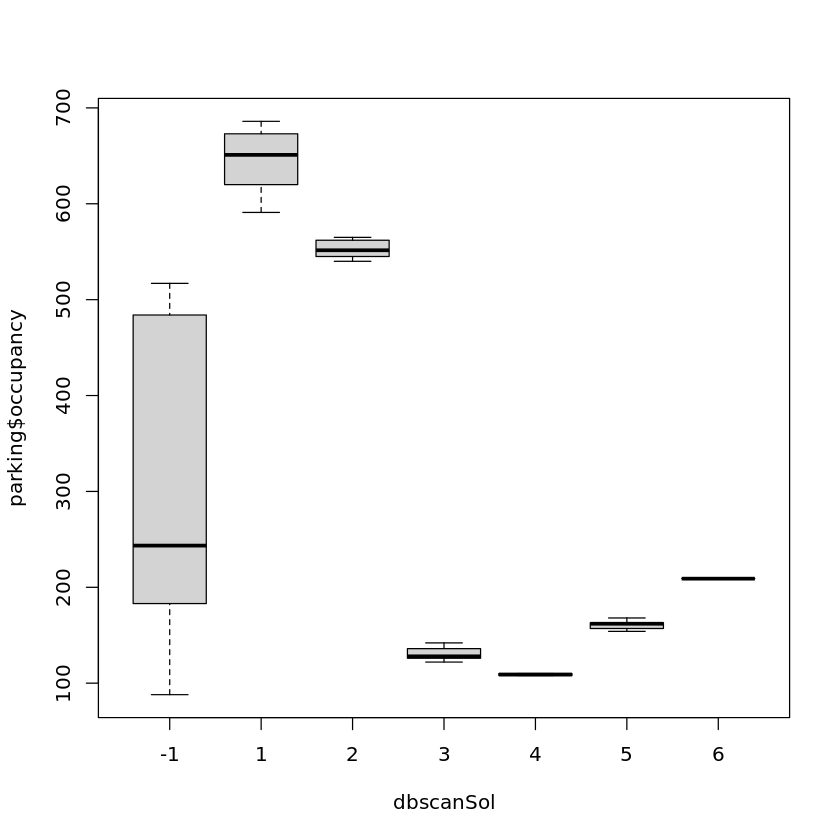

In [4]:
dbscanSol <- dbscan(parking$occupancy, 2, 10)
boxplot(parking$occupancy ~ dbscanSol)

### (iv)

What are the differences between the clusters? Why is the comparative boxplot of the outliers not useful?

#### Solution <a class="tocSkip">

From the boxplots, it is clear that two of the clusters, near the top of the plot, correspond to days when the occupancy was high. The other four, near the bottom right corner of the plot, correspond to days when the occupancy was low. 

The outliers are observations that are not close to be part of any cluster --- or other outliers. So, it is not surprising that they cover a large range. The boxplot of the outliers is given at the dbscanSol of '$-1$'.

## (c) Trying other values of $g_{\min}$

With $g_{\min}=2$ and $d_{\max} = 10$, DBScan appears to have split the main clusters in the data into subclusters. 

So, what happens when different values of $g_{\min}$ are used (whilst keeping $d_{\max}=10$)? In particular, when $g_{\min}=2,3,4,...,10$?

We could do this by copying, pasting and amending the code. Just as in Notebook activity B1.4, this quickly gets tedious. So, instead, we will use a `for` loop again. This time we use the following code.
```
for (gmin in 2:10){
    cat("\n For gmin =",gmin,"\n")    
    dbscanSol <- dbscan(parking$occupancy, gmin, 10)
    print(table(dbscanSol))
}
```
Notice that this time the parameter that changes is called `gmin`. This change is done to make the code easier to understand. We could have used `j` or `k` instead. Also, it is `table(dbscanSol)` that is printed, not `mean(occupancySilhouette)`. This tells R to print a frequency table of the cluster allocations. (Though, as you see, a not very well formatted table). 

### (i)

Run the code below to obtain the clusters suggested by DBScan for $g_{\min}=2,3,4,...,10$.

In [ ]:
for (gmin in 2:10){
    cat("\n For gmin =",gmin,"\n")    
    dbscanSol <- dbscan(parking$occupancy, gmin, 10)
    print(table(dbscanSol))
}

### (ii)

How does the number of outliers vary as $g_{\min}$ increases? How does the number and size of the clusters change?

#### Solution <a class="tocSkip">

As $g_{\min}$ increases, the number of observations that are judged to be outliers has increased. More importantly, in particular with $g_{\min} = 10$, a total of $32$ out of the $73$ observations ($44\%$) have been labelled as being outliers. 

Also $g_{\min}$ increases as the number of clusters found has decreased. One reason for this decrease in the number of clusters is that some groups of observations start to be deemed too small to be a cluster in their own right and all get labelled as outliers.

## (d) Trying other values of $d_{\max}$

Now, we will explore the impact of changing the value of $d_{\max}$, whilst keeping $g_{\min} = 2$. For these data, we will try $d_{\max} = 10, 15, 20, 30, 40, 50, 100, 200$ and $400$.

Despite the gaps between the values of $d_{\max}$ that we are going to try are not even, it is still possible to do this using a `for` loop. Recall so far in the loops, we have used `2:10` to tell R that we wish to use the integers 2, 3, ... 10. We can replace this by a vector containing the values we wish to use. For example:
```
c(10, 15, 20, 30, 40, 50, 100, 200, 400)
```
tells R to use these values (and none others). 

### (i)

Copy, paste and adapt the for loop given in part (c)(i) to obtain the cluster solutions from DBScan using the values $d_{\max} = 10, 15, 20, 30, 40, 50, 100, 200$ and $400$ (and with $g_{\min} = 2$).

#### Solution <a class="tocSkip">

The required code is given in the code cell below. Running the code produces the cluster solutions from DBScan using the chosen values of $d_{\max}$.

In [6]:
for (dmax in c(10, 15, 20, 30, 40, 50, 100, 400)){
    cat("\n For dmax =",dmax,"\n")    
    dbscanSol <- dbscan(parking$occupancy, 2, dmax)
    print(table(dbscanSol))
}


 For dmax = 10 
dbscanSol
-1  1  2  3  4  5  6 
 6 45  6  7  2  5  2 

 For dmax = 15 
dbscanSol
-1  1  2  3  4  5 
 3 45  6 15  2  2 

 For dmax = 20 
dbscanSol
-1  1  2  3  4  5 
 2 45  6 16  2  2 

 For dmax = 30 
dbscanSol
-1  1  2 
 1 52 20 

 For dmax = 40 
dbscanSol
 1  2 
53 20 

 For dmax = 50 
dbscanSol
 1  2 
53 20 

 For dmax = 100 
dbscanSol
 1  2 
53 20 

 For dmax = 400 
dbscanSol
 1 
73 


### (ii)

How does the number of outliers vary as $d_{\max}$ increases? How does the number and size of the clusters change?

#### Solution <a class="tocSkip">

As the value of $d_{\max}$ increases, the number of observations that are deemed to be outliers decreases. So, by the time $d_{\max} = 40$, none of the observations are deemed to be outliers.

As the value of $d_{\max}$ increases, the number of clusters is found to decrease. So, by the time $d_{\max} = 30$, just two clusters are found, and one cluster when $d_{\max} = 400$.

This is because as $d_{\max}$ increases, observations can be futher apart, and still be deemed close enough to be regarded as part of the same cluster. This means that outlying observations are no longer regarded as too different to observations in cluster, and that observations in two different clusters are regarded as being similar enough to be part of the same cluster. 

## (d) And finally...

### (i)

Rerun DBScan on these data with $g_{\min}=2$ and $d_{\max} = 30$, saving the cluster allocations in a vector. Obtain a comparative boxplot of this clustering.

#### Solution <a class="tocSkip">

Running the code below stores the cluster allocations produced by DBScan, with $g_{\min}=2$ and $d_{\max} = 30$, in `dbscanSol`. This is then used to obtain the required comparative boxplot.

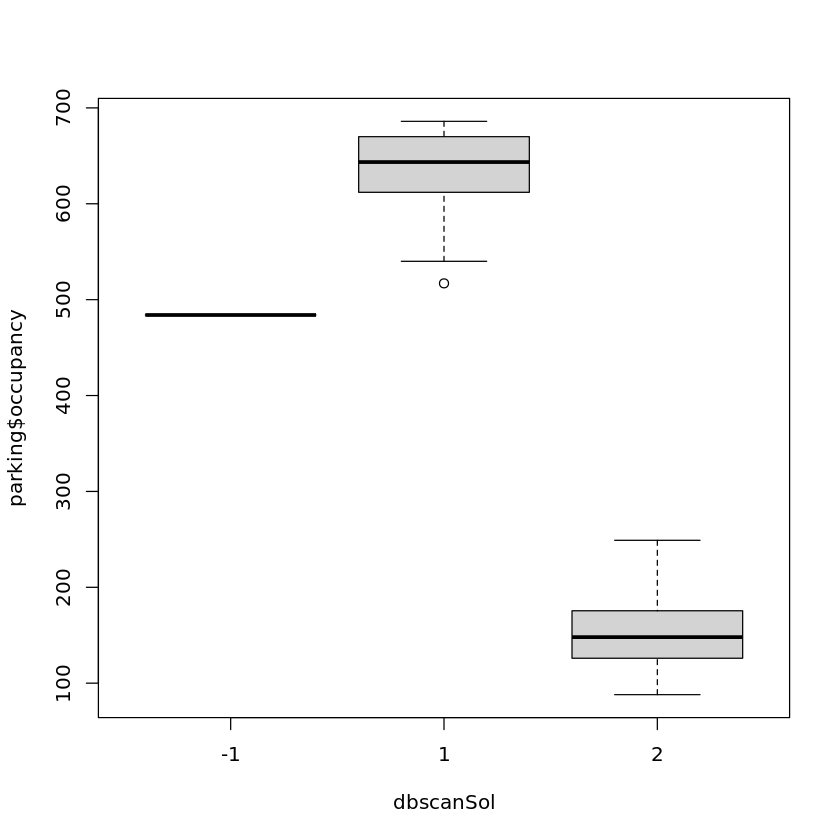

In [7]:
dbscanSol <- dbscan(parking$occupancy, 2, 30)
boxplot(parking$occupancy ~ dbscanSol)

### (ii)

How does this compare with the two-cluster solutions you have found using hierarchical clustering and by using $k$-means? Are the clusters found similar? 

Are there any outliers? If so, in what way do they appear to be outlying.

#### Solution <a class="tocSkip">

The solution is very similar. There have been two clusters found, and these are similar to the ones identified before. 

One observation has been identified as an outlier. It is a day that is far closer to the 'weekday' cluster than the 'weekend' cluster. So, it is a weekday on which, for some reason, the car park was emptier than usual.

### (iii)

Calculate the mean silhouette statistic for this solution. 

#### Solution <a class="tocSkip">

Running the code below calculates the silhouette statistics for the DBScan solution, with $g_{\min}=2$ and $d_{\max} = 30$, and saves it in `occupancySilhouette`. It then gives the mean of `occupancySilhouette` as 0.660, to three decimal places.

In [8]:
occupancySilhouette <- silhouette(parking$occupancy, dbscanSol)
mean(occupancySilhouette)

[1] 0.6596236

### (iv)

How does this mean silhouette statistic compare with the mean silhouette of the two-cluster solutions found using hierarchical cluster and $k$-means? Which solution does this suggest is better?

#### Solution <a class="tocSkip">

The mean silhouette statistic for the two-cluster solutions found using hierarchical clustering and $k$-means was 0.887.

This suggests that the two-cluster solution with an outlier is worse than the two-cluster solutions that include the outlier as part of one of the clusters. 

This is not surprising. The outlier could be thought of as forming a cluster all by itself. Yet, in Notebook activity B1.4, the three-cluster solution found using $k$-means was worse than the two-cluster solution. 